Ridge Regression:
Mean Squared Error: 116.83
Coefficients: [85.21169344]
Intercept: 1.2063734479479085

Lasso Regression:
Mean Squared Error: 109.64
Coefficients: [87.00470824]
Intercept: 1.222007251604061

ElasticNet Regression:
Mean Squared Error: 143.64
Coefficients: [82.14737455]
Intercept: 1.179654784033866



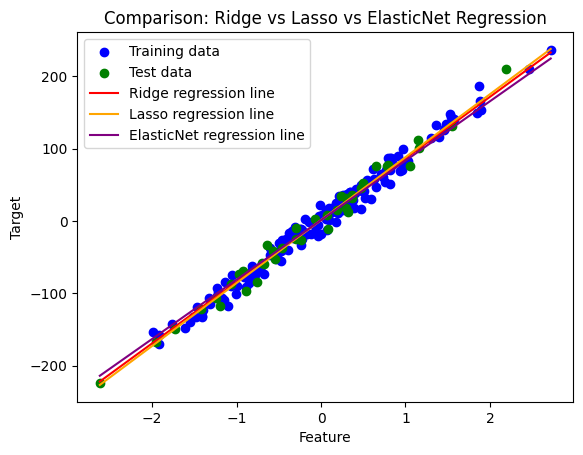

In [5]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import numpy as np

# Generate some sample data
X, y = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge regression model
ridge_model = Ridge(alpha=3.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print("Ridge Regression:")
print(f"Mean Squared Error: {ridge_mse:.2f}")
print(f"Coefficients: {ridge_model.coef_}")
print(f"Intercept: {ridge_model.intercept_}\n")

# Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Lasso tends to require smaller alpha values
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print("Lasso Regression:")
print(f"Mean Squared Error: {lasso_mse:.2f}")
print(f"Coefficients: {lasso_model.coef_}")
print(f"Intercept: {lasso_model.intercept_}\n")

# ElasticNet regression model
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Balance between L1 and L2
elastic_model.fit(X_train, y_train)
elastic_pred = elastic_model.predict(X_test)
elastic_mse = mean_squared_error(y_test, elastic_pred)
print("ElasticNet Regression:")
print(f"Mean Squared Error: {elastic_mse:.2f}")
print(f"Coefficients: {elastic_model.coef_}")
print(f"Intercept: {elastic_model.intercept_}\n")

# Plotting results
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')

X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

plt.plot(X_line, ridge_model.predict(X_line), color='red', label='Ridge regression line')
plt.plot(X_line, lasso_model.predict(X_line), color='orange', label='Lasso regression line')
plt.plot(X_line, elastic_model.predict(X_line), color='purple', label='ElasticNet regression line')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.title('Comparison: Ridge vs Lasso vs ElasticNet Regression')
plt.show()
